In [ ]:
!pip install "pandas>=2.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 33.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.


In [ ]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display
import seaborn as sns
sns.set()


import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-v0_8')   # The 'seaborn' style is deprecated

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"IPython {IPython.__version__}" )
print( f"Matplotlib {mpl.__version__}" )

Python 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
Pandas 2.0.3
NumPy 1.22.4
IPython 7.34.0
Matplotlib 3.7.1


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Brent_GRM.csv to Brent_GRM.csv


In [ ]:
df1 = pd.read_csv("Brent_GRM.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    545 non-null    object 
 1   Brent   545 non-null    float64
 2   GRM     545 non-null    float64
dtypes: float64(2), object(1)
memory usage: 12.9+ KB


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Chemical_price.csv to Chemical_price.csv


In [ ]:
df2 = pd.read_csv("Chemical_price.csv")
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             545 non-null    object 
 1   Ethylene price   545 non-null    int64  
 2   Propylene price  545 non-null    int64  
 3   HDPE price       545 non-null    int64  
 4   PP price         545 non-null    int64  
 5   PX price         545 non-null    float64
 6   Benzene price    545 non-null    int64  
 7   ABS price        545 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 34.2+ KB


,date,Ethylene price,Propylene price,HDPE price,PP price,PX price,Benzene price,ABS price
0,'2013-01-04,1210,1240,1415,1450,1655.00,1480,2000
1,'2013-01-11,1265,1280,1455,1495,1645.00,1385,2020
2,'2013-01-18,1325,1285,1470,1505,1650.00,1425,2020
3,'2013-01-25,1350,1295,1490,1535,1670.00,1410,2050
4,'2013-02-01,1350,1330,1490,1550,1680.00,1390,2050
...,...,...,...,...,...,...,...,...
540,'2023-05-12,855,865,1070,1050,1013.02,835,1390
541,'2023-05-19,845,855,1050,1040,970.48,885,1360
542,'2023-05-26,825,795,1040,1020,980.44,850,1340
543,'2023-06-02,825,775,1020,970,968.82,840,1300


In [ ]:
def date_quarter(x):
  if x >= 1 and x <= 3:
    q = 'Q1'
  elif x >= 4 and x <= 6:
    q = 'Q2'
  elif x >= 7 and x <= 9:
    q = 'Q3'
  elif x >= 10 and x <= 12:
    q = 'Q4'
  return q


In [ ]:
df3 = pd.merge( df1, df2, left_on='date', right_on='date',how='left' )
df3['date_txt'] = df3['date'].apply(lambda x : str(x))
#>>> for format date yyyy-mm-dd
df3['date_y'] = df3['date_txt'].apply(lambda x : x[1:5])
df3['date_m'] = df3['date_txt'].apply(lambda x : int(x[6:8]))
df3['date_q'] = df3['date_m'].apply(lambda x : date_quarter(x) )
df3['period_Q'] = df3['date_y'] + '_' + df3['date_q']

# >>> for format date = d/m/yyyy
#df3['date_y'] = df3['date_txt'].apply(lambda x : x[len(x)-4:])
#df3['date_m'] = df3['date_txt'].apply(lambda x : int(x[x.find('/')+1:len(x)-5]))
#df3['date_q'] = df3['date_m'].apply(lambda x : date_quarter(x) )
#df3['period_Q'] = df3['date_y'] + '_' + df3['date_q']


#a = df3.sort_values(by = 'date_m', ascending = False)
#a
df3

,date,Brent,GRM,Ethylene price,Propylene price,HDPE price,PP price,PX price,Benzene price,ABS price,date_txt,date_y,date_m,date_q,period_Q
0,'2013-01-04,111.36,6.62,1210,1240,1415,1450,1655.00,1480,2000,'2013-01-04,2013,1,Q1,2013_Q1
1,'2013-01-11,110.59,6.60,1265,1280,1455,1495,1645.00,1385,2020,'2013-01-11,2013,1,Q1,2013_Q1
2,'2013-01-18,112.97,7.98,1325,1285,1470,1505,1650.00,1425,2020,'2013-01-18,2013,1,Q1,2013_Q1
3,'2013-01-25,114.69,7.27,1350,1295,1490,1535,1670.00,1410,2050,'2013-01-25,2013,1,Q1,2013_Q1
4,'2013-02-01,116.54,9.09,1350,1330,1490,1550,1680.00,1390,2050,'2013-02-01,2013,2,Q1,2013_Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,'2023-05-12,74.38,3.67,855,865,1070,1050,1013.02,835,1390,'2023-05-12,2023,5,Q2,2023_Q2
541,'2023-05-19,75.75,4.85,845,855,1050,1040,970.48,885,1360,'2023-05-19,2023,5,Q2,2023_Q2
542,'2023-05-26,76.90,4.47,825,795,1040,1020,980.44,850,1340,'2023-05-26,2023,5,Q2,2023_Q2
543,'2023-06-02,76.11,4.48,825,775,1020,970,968.82,840,1300,'2023-06-02,2023,6,Q2,2023_Q2


https://matplotlib.org/2.0.0/examples/color/named_colors.html

In [ ]:
df4 = df3[['period_Q','Brent','GRM','Ethylene price','Propylene price','HDPE price','PP price','PX price','Benzene price', 'ABS price']].groupby('period_Q')
avg = df4[['Brent','GRM','Ethylene price','Propylene price','HDPE price','PP price','PX price','Benzene price', 'ABS price']].mean().reset_index()
avg

,period_Q,Brent,GRM,Ethylene price,Propylene price,HDPE price,PP price,PX price,Benzene price,ABS price
0,2013_Q1,112.806154,8.649231,1296.153846,1305.384615,1479.230769,1518.846154,1603.076923,1375.000000,2027.692308
1,2013_Q2,102.734615,6.569231,1151.538462,1281.538462,1430.384615,1456.923077,1419.615385,1287.307692,1923.846154
2,2013_Q3,110.566923,5.134615,1231.153846,1370.769231,1477.692308,1505.384615,1462.692308,1260.769231,1934.615385
3,2013_Q4,109.504615,4.333846,1335.000000,1406.538462,1529.230769,1541.153846,1408.846154,1288.461538,1906.538462
4,2014_Q1,108.084615,6.236923,1416.538462,1394.615385,1541.923077,1554.230769,1261.923077,1300.769231,1921.923077
5,2014_Q2,109.990769,5.787692,1378.461538,1357.692308,1579.230769,1559.230769,1240.769231,1296.538462,1916.538462
6,2014_Q3,102.110769,4.873077,1492.692308,1361.538462,1609.230769,1569.615385,1332.692308,1303.461538,1945.000000
7,2014_Q4,76.416923,5.991538,1178.461538,1006.538462,1453.076923,1403.076923,982.307692,954.615385,1788.846154
8,2015_Q1,54.513077,8.220769,955.000000,852.307692,1201.538462,1115.000000,811.538462,681.153846,1528.461538
9,2015_Q2,62.123846,7.997692,1361.153846,981.923077,1370.769231,1340.384615,918.076923,811.923077,1642.307692


Text(2021_Q4, 80, '   Russia - Ukraine war')

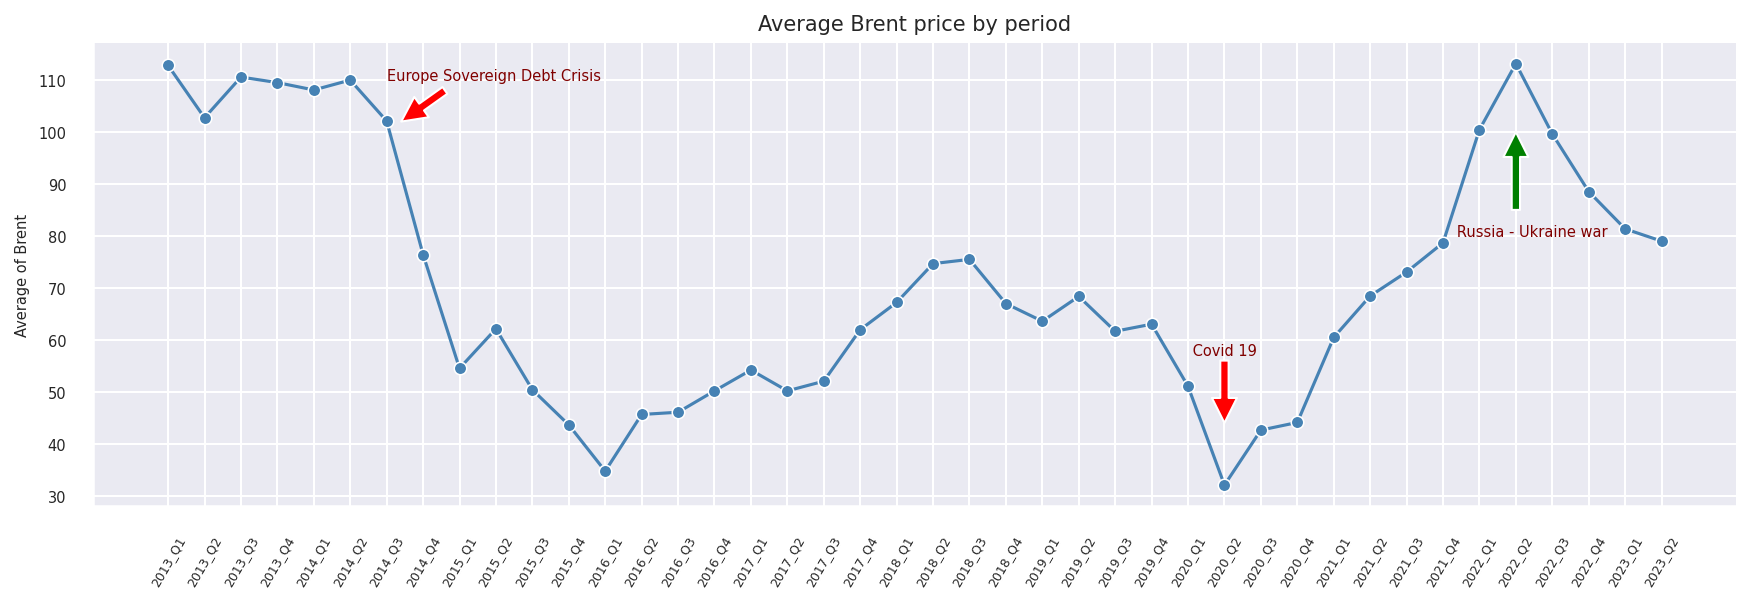

In [ ]:
#Graph1
sns.set(rc={'figure.dpi':150})
sns.set(rc={ 'figure.facecolor':'white'})
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

ax = sns.relplot(kind='line',
            data=avg,
            x='period_Q', y='Brent',
            marker='o',
            color = 'steelblue',
            height=4, aspect=3)

ax = plt.title('Average Brent price by period', size = 10)
ax = plt.ylabel('Average of Brent', size = 7)
ax = plt.xlabel('')

_ = plt.setp( plt.gca().get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( plt.gca().get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

style = dict(size=7, color='maroon')

plt.annotate('', xy=('2014_Q3',100), xytext=('2015_Q1',110), arrowprops=dict(facecolor='red', shrink=0.2) )
plt.text('2014_Q3', 110, "Europe Sovereign Debt Crisis", **style)

plt.annotate('', xy=('2020_Q2',40), xytext=('2020_Q2',60), arrowprops=dict(facecolor='red', shrink=0.2) )
plt.text('2020_Q1', 57, " Covid 19", **style)

plt.annotate('', xy=('2022_Q2',105), xytext=('2022_Q2',80), arrowprops=dict(facecolor='green', shrink=0.2) )
plt.text('2021_Q4', 80, "   Russia - Ukraine war", **style)

Text(2022_Q3, 16, 'Russia - Ukraine war')

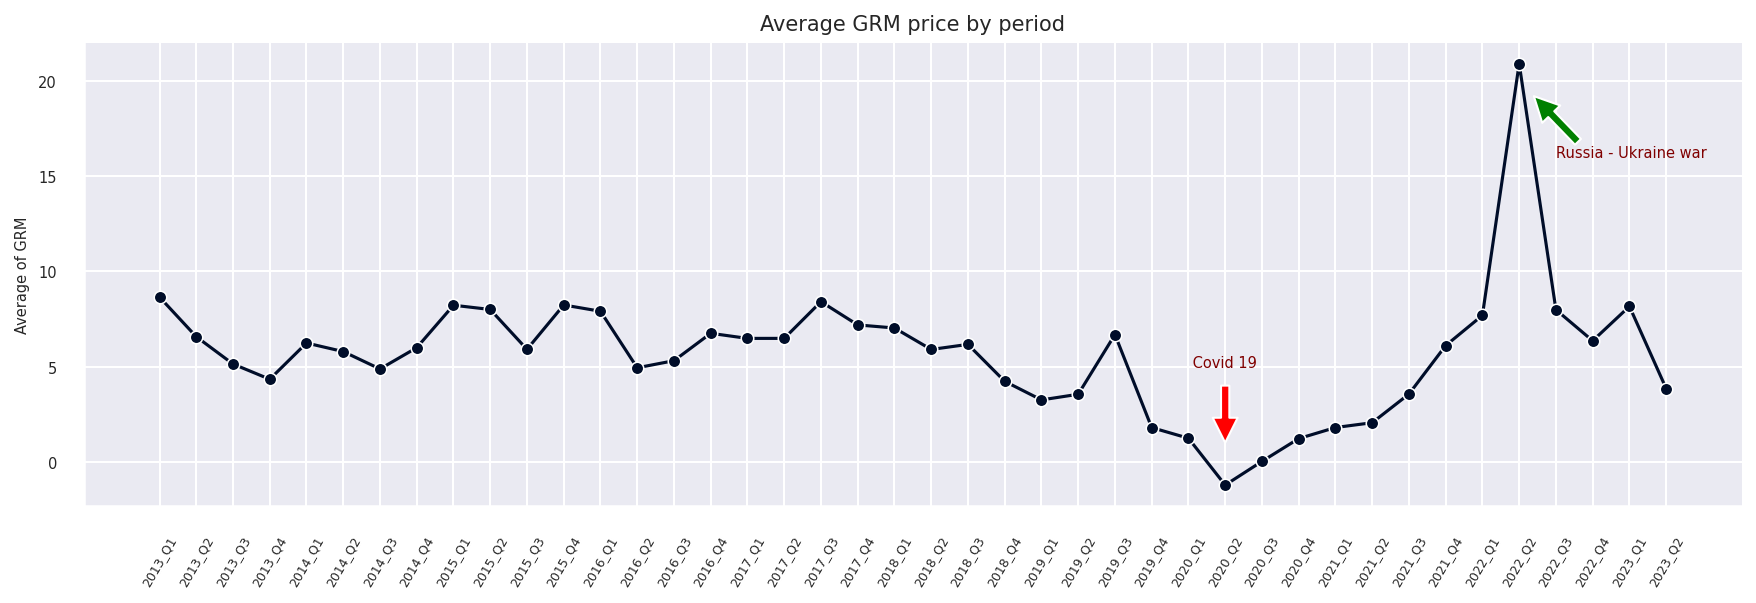

In [ ]:
#Graph2

sns.set(rc={'figure.dpi':150})
sns.set(rc={ 'figure.facecolor':'white'})
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
ax2 = sns.relplot(kind='line',
            data=avg,
            x='period_Q', y='GRM',
            marker='o',
            color = '#000D29',
            height=4, aspect=3)
ax2 = plt.title('Average GRM price by period', size = 10)
ax2 = plt.ylabel('Average of GRM', size = 7)
ax2 = plt.xlabel('')
#ax2.set(xlabel='', ylabel='Average of GRM')
_ = plt.setp( plt.gca().get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( plt.gca().get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

style = dict(size=7, color='maroon')

plt.annotate('', xy=('2020_Q2',0), xytext=('2020_Q2',5), arrowprops=dict(facecolor='red', shrink=0.2) )
plt.text('2020_Q1', 5, " Covid 19", **style)

plt.annotate('', xy=('2022_Q2',20), xytext=('2022_Q4',16), arrowprops=dict(facecolor='green', shrink=0.2) )
plt.text('2022_Q3', 16, "Russia - Ukraine war", **style)

<ipython-input-50-dc51268aa9c2>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.lineplot(x='period_Q', y='Ethylene price', color='sienna', ci='sd', data=avg, ax=ax, marker='o', label= 'Ethylene price')
<ipython-input-50-dc51268aa9c2>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.lineplot(x='period_Q', y='Propylene price', color='seagreen', ci='sd', data=avg, linestyle = 'dashed', ax=ax, marker='o', label= 'Propylene price')


Text(2020_Q1, 1000, ' Covid 19')

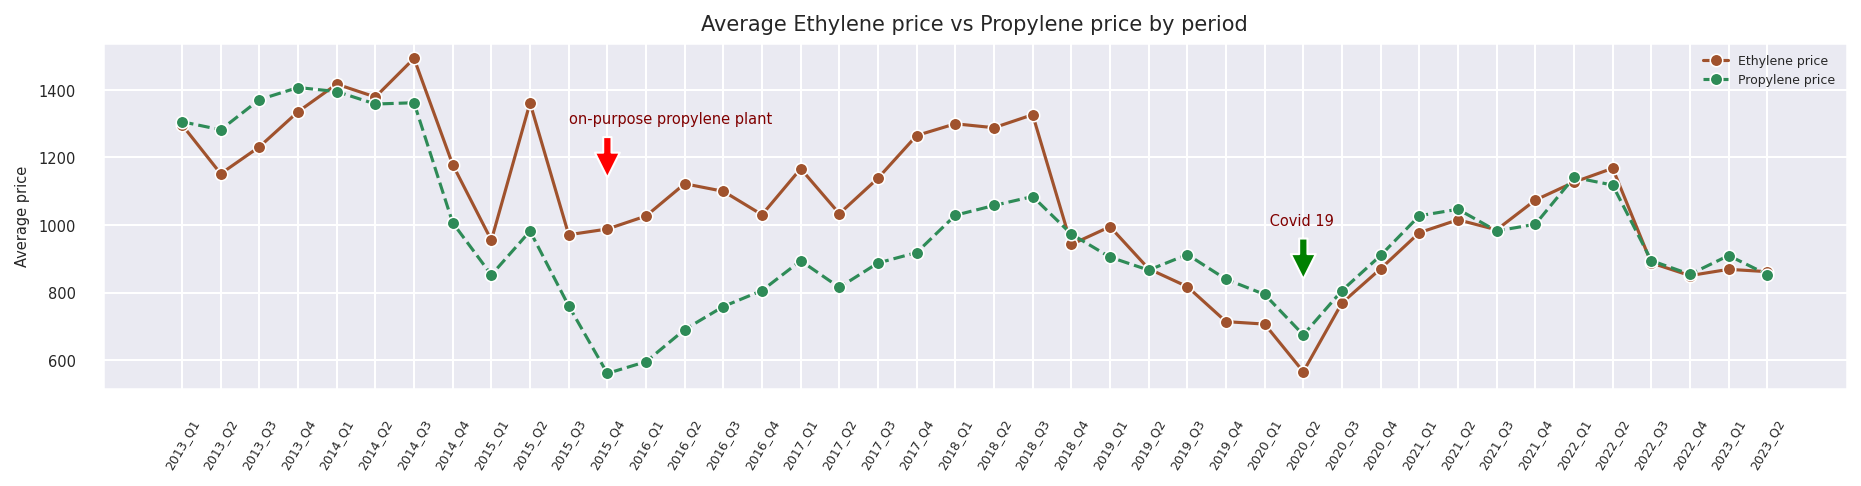

In [ ]:
#Graph3
sns.set(rc={'figure.dpi':150})
sns.set(rc={'figure.figsize':(15,3)})
sns.set(rc={ 'figure.facecolor':'white'})
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

fig, ax = plt.subplots()
a = sns.lineplot(x='period_Q', y='Ethylene price', color='sienna', ci='sd', data=avg, ax=ax, marker='o', label= 'Ethylene price')
a = plt.legend(['Ethylene price', 'Propylene price'],loc= 'upper right', fontsize= 6)

a = sns.lineplot(x='period_Q', y='Propylene price', color='seagreen', ci='sd', data=avg, linestyle = 'dashed', ax=ax, marker='o', label= 'Propylene price')
a = plt.title('Average Ethylene price vs Propylene price by period', size = 10)

a = plt.xlabel('')
a = plt.ylabel('Average price', size = 7)

a = plt.legend(loc= 'upper right', fontsize= 6)

_ = plt.setp( plt.gca().get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( plt.gca().get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

style = dict(size=7, color='maroon')

plt.annotate('', xy=('2015_Q4',1100), xytext=('2015_Q4',1300), arrowprops=dict(facecolor='red', shrink=0.2) )
plt.text('2015_Q3', 1300, "on-purpose propylene plant", **style)

plt.annotate('', xy=('2020_Q2', 800), xytext=('2020_Q2',1000), arrowprops=dict(facecolor='green', shrink=0.2) )
plt.text('2020_Q1', 1000, " Covid 19", **style)

<ipython-input-13-63f7e32efb3b>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.barplot(x='period_Q', y='Ethylene price', color='sienna', ci='sd', data=avg, ax=ax)
<ipython-input-13-63f7e32efb3b>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.lineplot(x='period_Q', y='HDPE price', color='#10000C', ci='sd', data=avg, ax=ax)


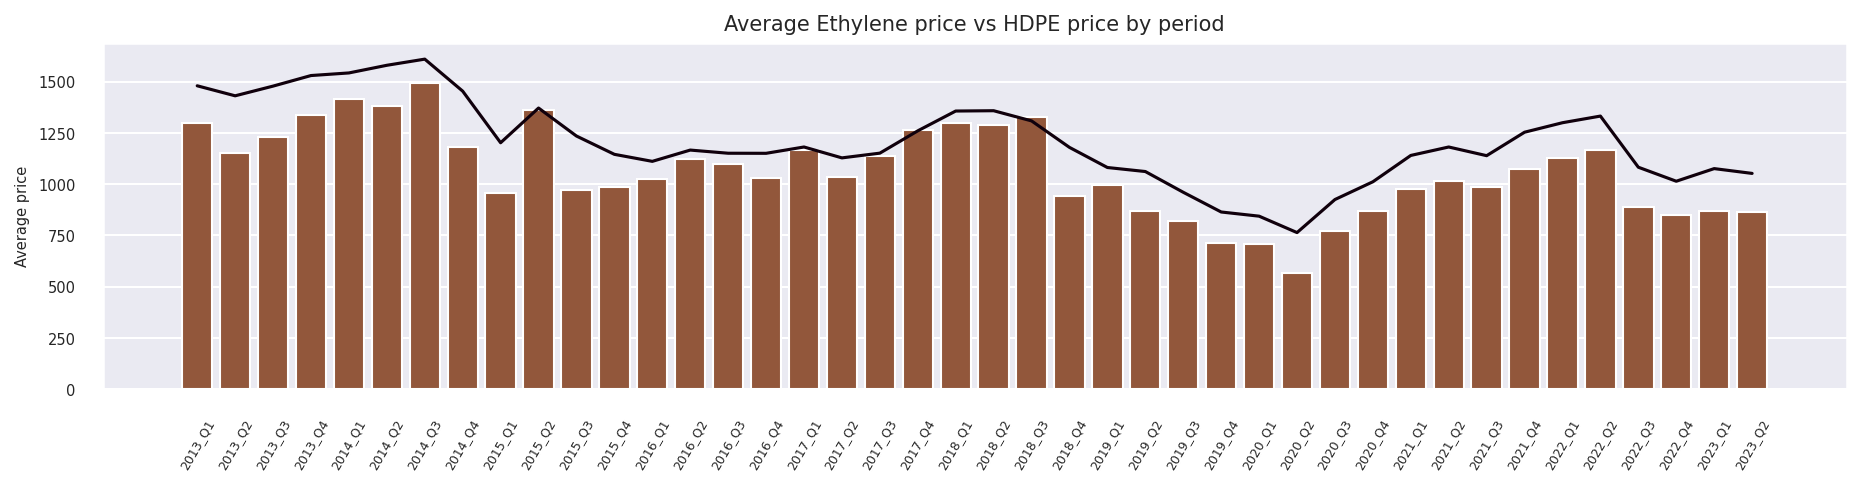

In [ ]:
#Graph4
sns.set(rc={'figure.dpi':150})
sns.set(rc={'figure.figsize':(15,3)})
sns.set(rc={ 'figure.facecolor':'white'})
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

fig, ax = plt.subplots()
a = sns.barplot(x='period_Q', y='Ethylene price', color='sienna', ci='sd', data=avg, ax=ax)
a = sns.lineplot(x='period_Q', y='HDPE price', color='#10000C', ci='sd', data=avg, ax=ax)
a = plt.title('Average Ethylene price vs HDPE price by period', size = 10)
a = plt.xlabel('')
a = plt.ylabel('Average price', size = 7)

_ = plt.setp( plt.gca().get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( plt.gca().get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

<ipython-input-14-9be50c0fcf99>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.barplot(x='period_Q', y='Propylene price', color='seagreen', ci='sd', data=avg, ax=ax)
<ipython-input-14-9be50c0fcf99>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.lineplot(x='period_Q', y='PP price', color='#515B51', ci='sd', data=avg, ax=ax)


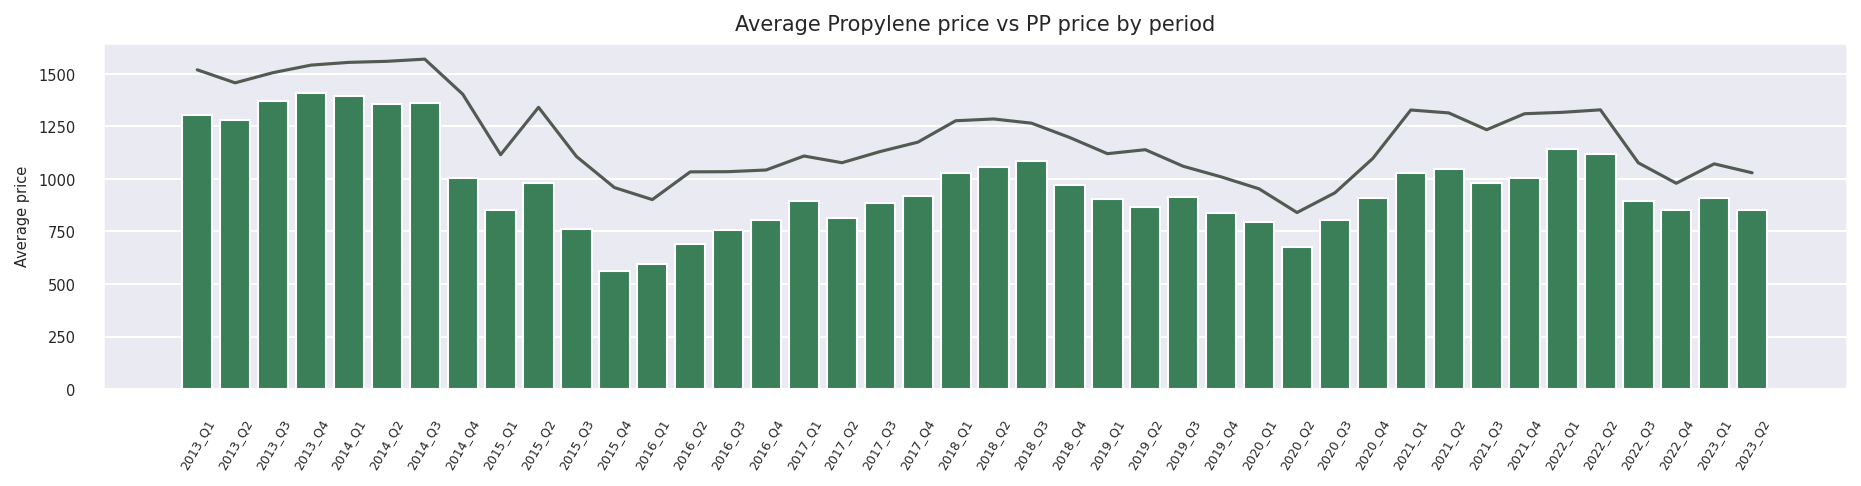

In [ ]:
#Graph5
sns.set(rc={'figure.dpi':150})
sns.set(rc={'figure.figsize':(15,3)})
sns.set(rc={ 'figure.facecolor':'white'})
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

fig, ax = plt.subplots()
a = sns.barplot(x='period_Q', y='Propylene price', color='seagreen', ci='sd', data=avg, ax=ax)
a = sns.lineplot(x='period_Q', y='PP price', color='#515B51', ci='sd', data=avg, ax=ax)
a = plt.title('Average Propylene price vs PP price by period', size = 10)
a = plt.xlabel('')
a = plt.ylabel('Average price', size = 7)

_ = plt.setp( plt.gca().get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( plt.gca().get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

<ipython-input-15-ac79de32394a>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.lineplot(x='period_Q', y='HDPE price', color='#10000C', ci='sd', data=avg, ax=ax)
<ipython-input-15-ac79de32394a>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.lineplot(x='period_Q', y='PP price', color='#515B51', ci='sd', data=avg, linestyle = 'dashed', ax=ax)


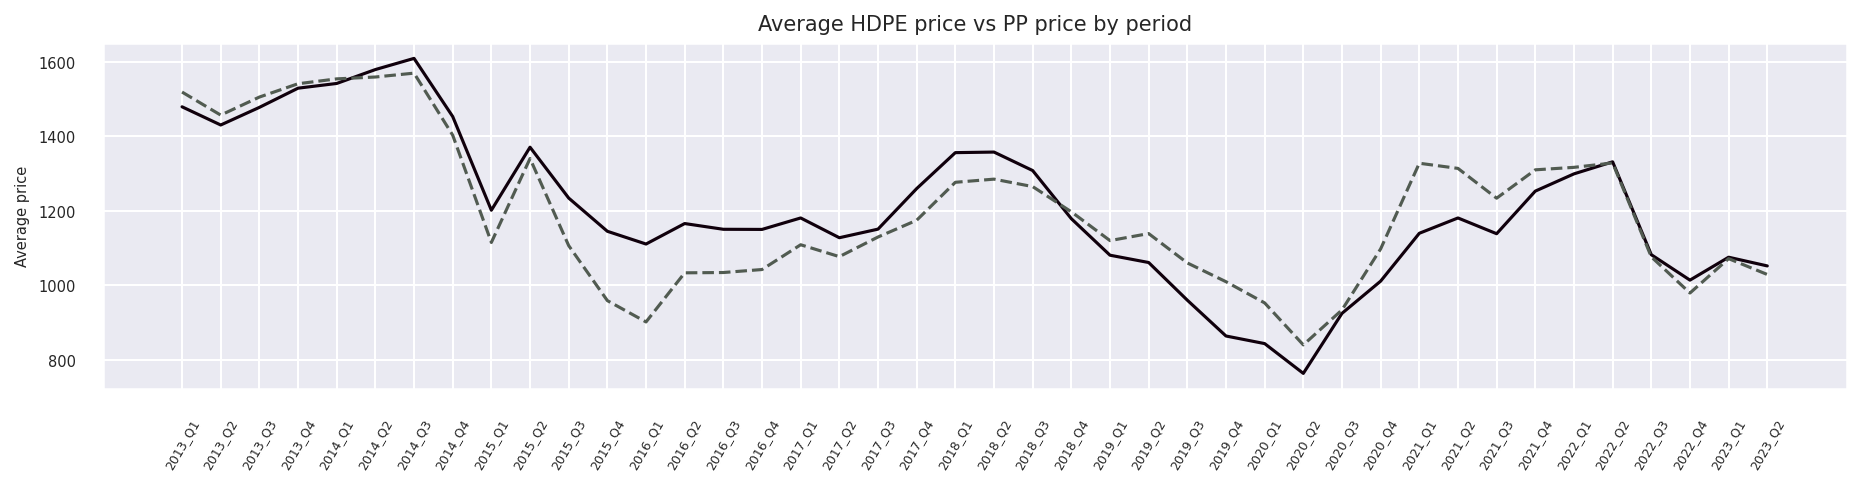

In [ ]:
#Graph6
sns.set(rc={'figure.dpi':150})
sns.set(rc={'figure.figsize':(15,3)})
sns.set(rc={ 'figure.facecolor':'white'})
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

fig, ax = plt.subplots()
a = sns.lineplot(x='period_Q', y='HDPE price', color='#10000C', ci='sd', data=avg, ax=ax)
a = sns.lineplot(x='period_Q', y='PP price', color='#515B51', ci='sd', data=avg, linestyle = 'dashed', ax=ax)
a = plt.title('Average HDPE price vs PP price by period', size = 10)
a = plt.xlabel('')
a = plt.ylabel('Average price', size = 7)

_ = plt.setp( plt.gca().get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( plt.gca().get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

<ipython-input-16-3f2b256d4a54>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.lineplot(x='period_Q', y='PX price', color='#8C7547', ci='sd', data=avg, ax=ax)
<ipython-input-16-3f2b256d4a54>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.lineplot(x='period_Q', y='Benzene price', color='#EFA747', ci='sd', data=avg, linestyle = 'dashed', ax=ax)


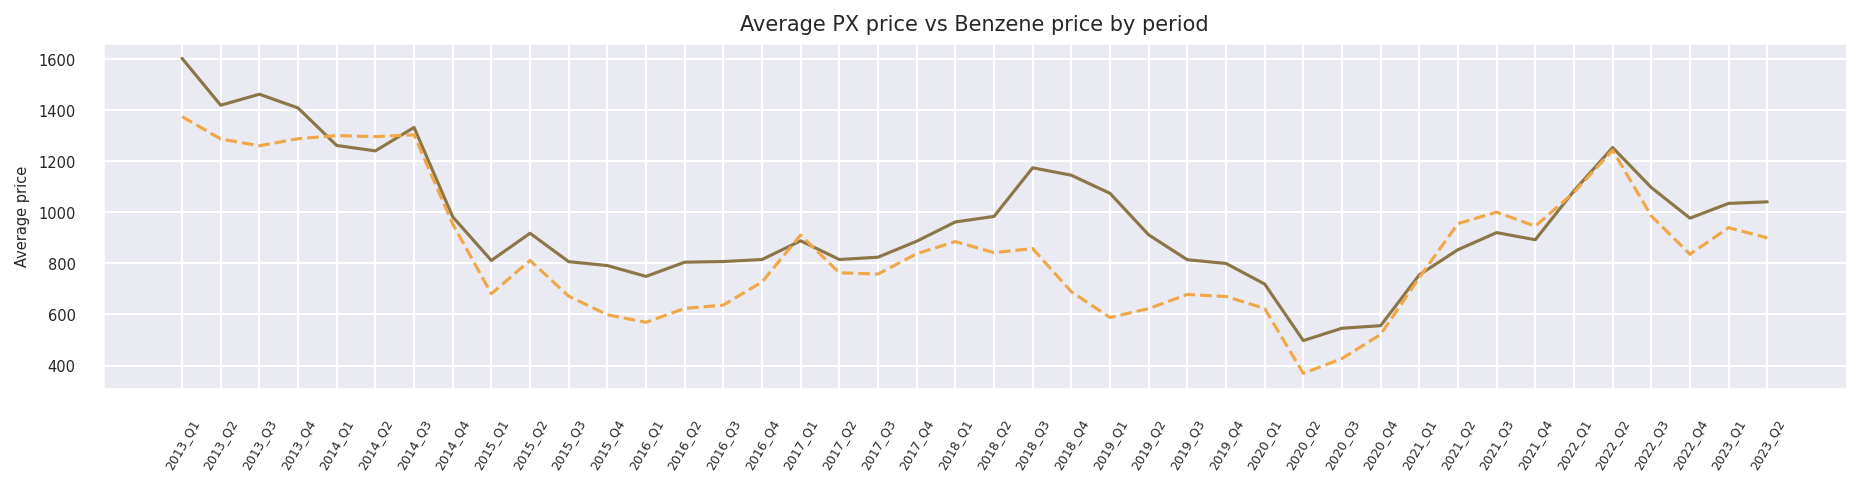

In [ ]:
#Graph7
sns.set(rc={'figure.dpi':150})
sns.set(rc={'figure.figsize':(15,3)})
sns.set(rc={ 'figure.facecolor':'white'})
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

fig, ax = plt.subplots()
a = sns.lineplot(x='period_Q', y='PX price', color='#8C7547', ci='sd', data=avg, ax=ax)
a = sns.lineplot(x='period_Q', y='Benzene price', color='#EFA747', ci='sd', data=avg, linestyle = 'dashed', ax=ax)
a = plt.title('Average PX price vs Benzene price by period', size = 10)
a = plt.xlabel('')
a = plt.ylabel('Average price', size = 7)

_ = plt.setp( plt.gca().get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( plt.gca().get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

<ipython-input-17-3d3ec130403a>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.barplot(x='period_Q', y='Brent', color='steelblue', ci='sd', data=avg, ax=ax)
<ipython-input-17-3d3ec130403a>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.lineplot(x='period_Q', y='Ethylene price', color='sienna', ci='sd', data=avg, ax=ax2)


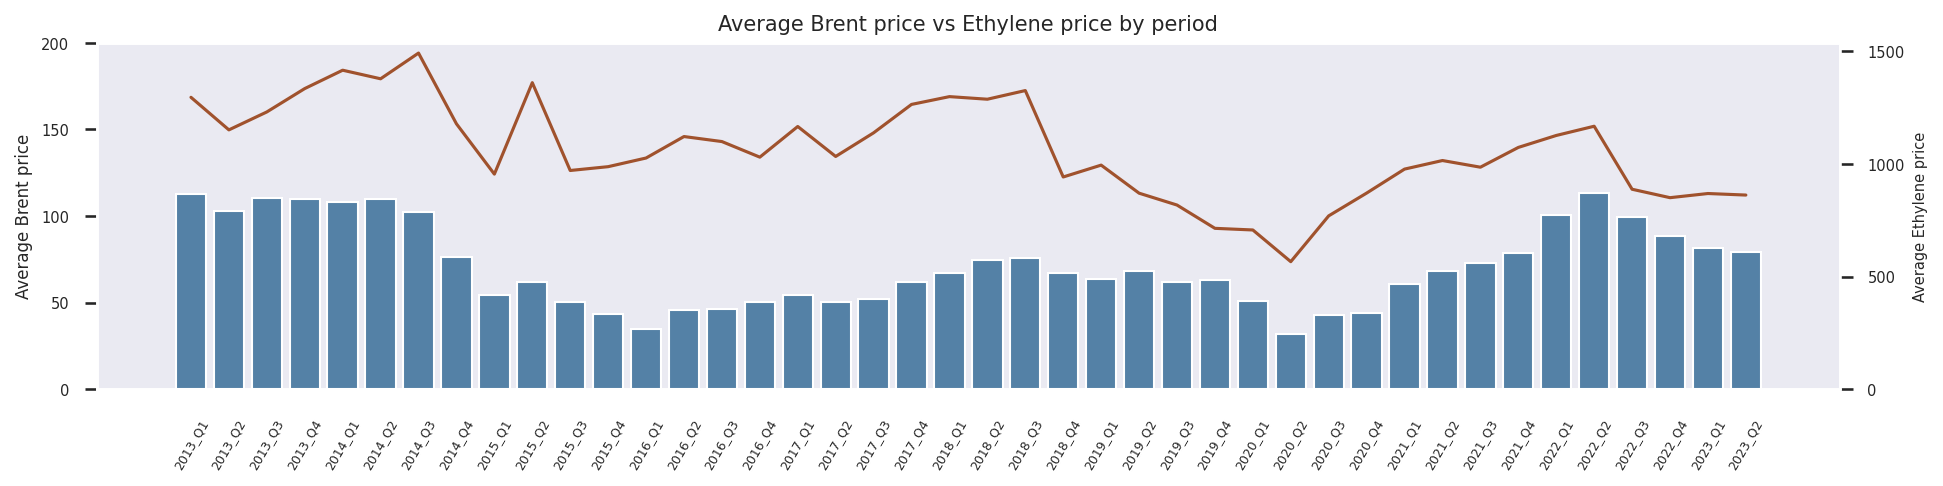

In [ ]:
#Graph8
sns.set(rc={'figure.dpi':150})
sns.set(rc={'figure.figsize':(15,3)})
sns.set(rc={ 'figure.facecolor':'white'})
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

fig, ax = plt.subplots()
ax2 = ax.twinx()
a = sns.barplot(x='period_Q', y='Brent', color='steelblue', ci='sd', data=avg, ax=ax)
a = ax.set_xlabel('')
ax.grid(False)
ticks = list(range(0,201,50))
a= ax.set_yticks(ticks)
a = ax.set_ylabel('Average Brent price', size = 8)
a = sns.lineplot(x='period_Q', y='Ethylene price', color='sienna', ci='sd', data=avg, ax=ax2)
a = plt.title('Average Brent price vs Ethylene price by period', size = 10)
a = ax2.set_xlabel('')
ax2.grid(False)
a = ax2.set_ylabel('Average Ethylene price', size = 7)
ticks2 = list(range(0,1600,500))
a= ax2.set_yticks(ticks2)


_ = plt.setp( ax.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( ax.get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

_ = plt.setp( ax2.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( ax2.get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

<ipython-input-18-88f22a5cdf80>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.barplot(x='period_Q', y='Brent', color='steelblue', ci='sd', data=avg, ax=ax)
<ipython-input-18-88f22a5cdf80>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.lineplot(x='period_Q', y='Propylene price', color='seagreen', ci='sd', data=avg, ax=ax2)


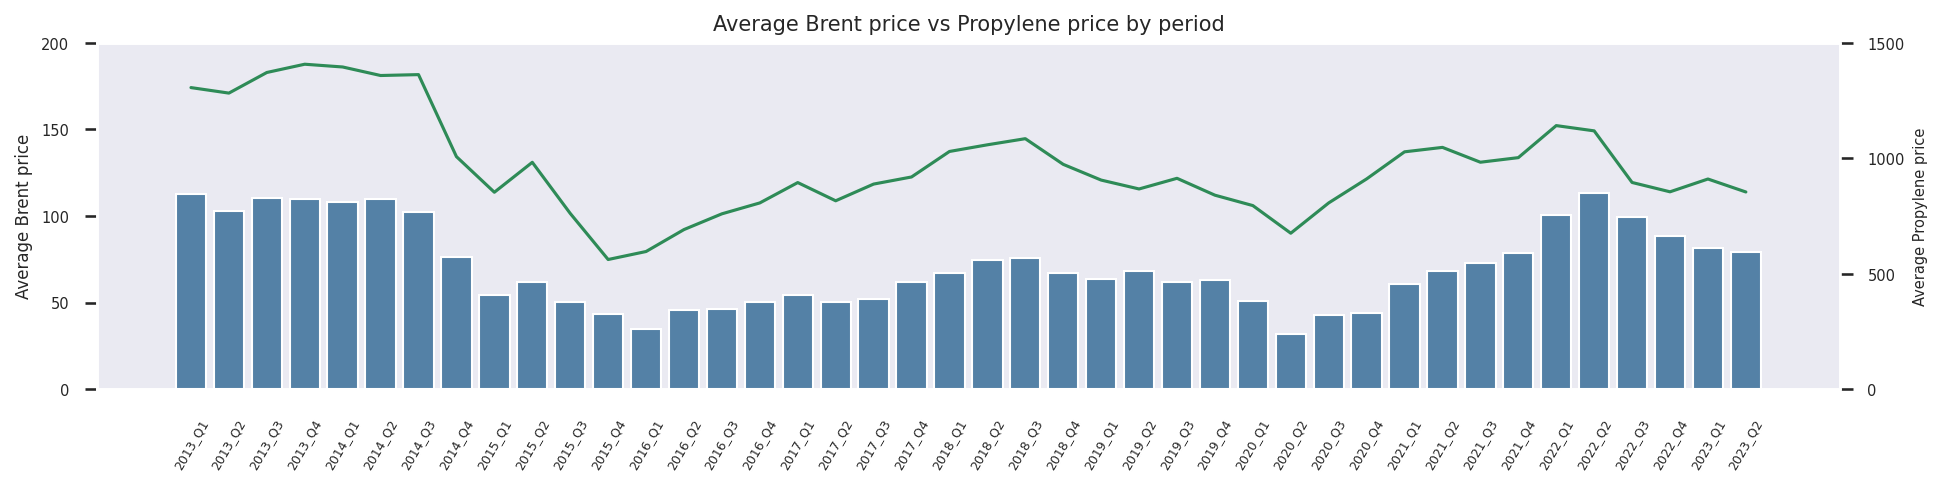

In [ ]:
#Graph9
sns.set(rc={'figure.dpi':150})
sns.set(rc={'figure.figsize':(15,3)})
sns.set(rc={ 'figure.facecolor':'white'})

fig, ax = plt.subplots()
ax2 = ax.twinx()
a = sns.barplot(x='period_Q', y='Brent', color='steelblue', ci='sd', data=avg, ax=ax)
a = ax.set_xlabel('')
ax.grid(False)
ticks = list(range(0,201,50))
a= ax.set_yticks(ticks)
a = ax.set_ylabel('Average Brent price', size = 8)
a = sns.lineplot(x='period_Q', y='Propylene price', color='seagreen', ci='sd', data=avg, ax=ax2)
a = plt.title('Average Brent price vs Propylene price by period', size = 10)
a = ax2.set_xlabel('')
ax2.grid(False)
ticks2 = list(range(0,1600,500))
a= ax2.set_yticks(ticks2)
a = ax2.set_ylabel('Average Propylene price', size = 7)


_ = plt.setp( ax.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( ax.get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

_ = plt.setp( ax2.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( ax2.get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

<ipython-input-19-af12f1a4843b>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.barplot(x='period_Q', y='Brent', color='steelblue', ci='sd', data=avg, ax=ax)
<ipython-input-19-af12f1a4843b>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.lineplot(x='period_Q', y='HDPE price', color='#10000C', ci='sd', data=avg, ax=ax2)


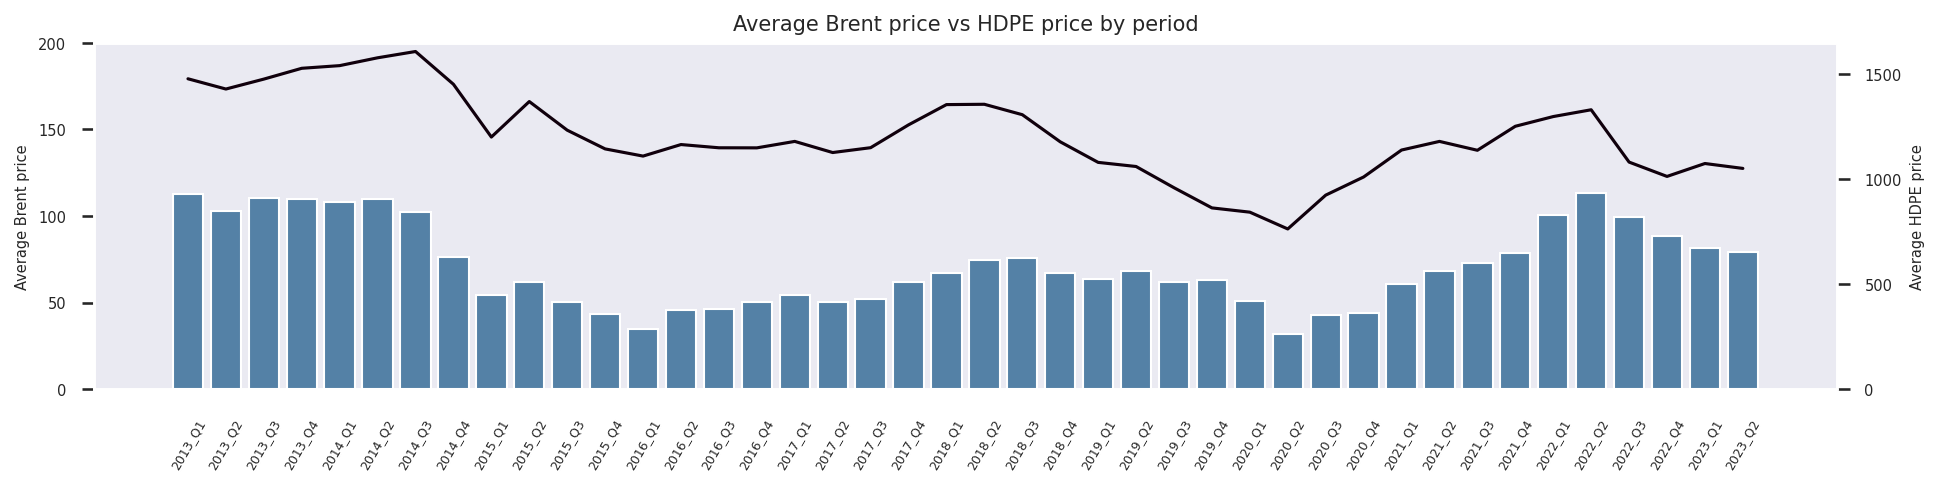

In [ ]:
#Graph10
sns.set(rc={'figure.dpi':150})
sns.set(rc={'figure.figsize':(15,3)})
sns.set(rc={ 'figure.facecolor':'white'})

fig, ax = plt.subplots()
ax2 = ax.twinx()
a = sns.barplot(x='period_Q', y='Brent', color='steelblue', ci='sd', data=avg, ax=ax)
a = ax.set_xlabel('')
ax.grid(False)
ticks = list(range(0,201,50))
a= ax.set_yticks(ticks)
a = ax.set_ylabel('Average Brent price', size = 7)
a = sns.lineplot(x='period_Q', y='HDPE price', color='#10000C', ci='sd', data=avg, ax=ax2)
a = plt.title('Average Brent price vs HDPE price by period', size = 10)
a = ax2.set_xlabel('')
ticks2 = list(range(0,1600,500))
a= ax2.set_yticks(ticks2)
ax2.grid(False)
a = ax2.set_ylabel('Average HDPE price', size = 7)


_ = plt.setp( ax.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( ax.get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

_ = plt.setp( ax2.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( ax2.get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

<ipython-input-20-2d0dd6267ae4>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.barplot(x='period_Q', y='Brent', color='steelblue', ci='sd', data=avg, ax=ax)
<ipython-input-20-2d0dd6267ae4>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.lineplot(x='period_Q', y='PP price', color='#515B51', ci='sd', data=avg, ax=ax2)


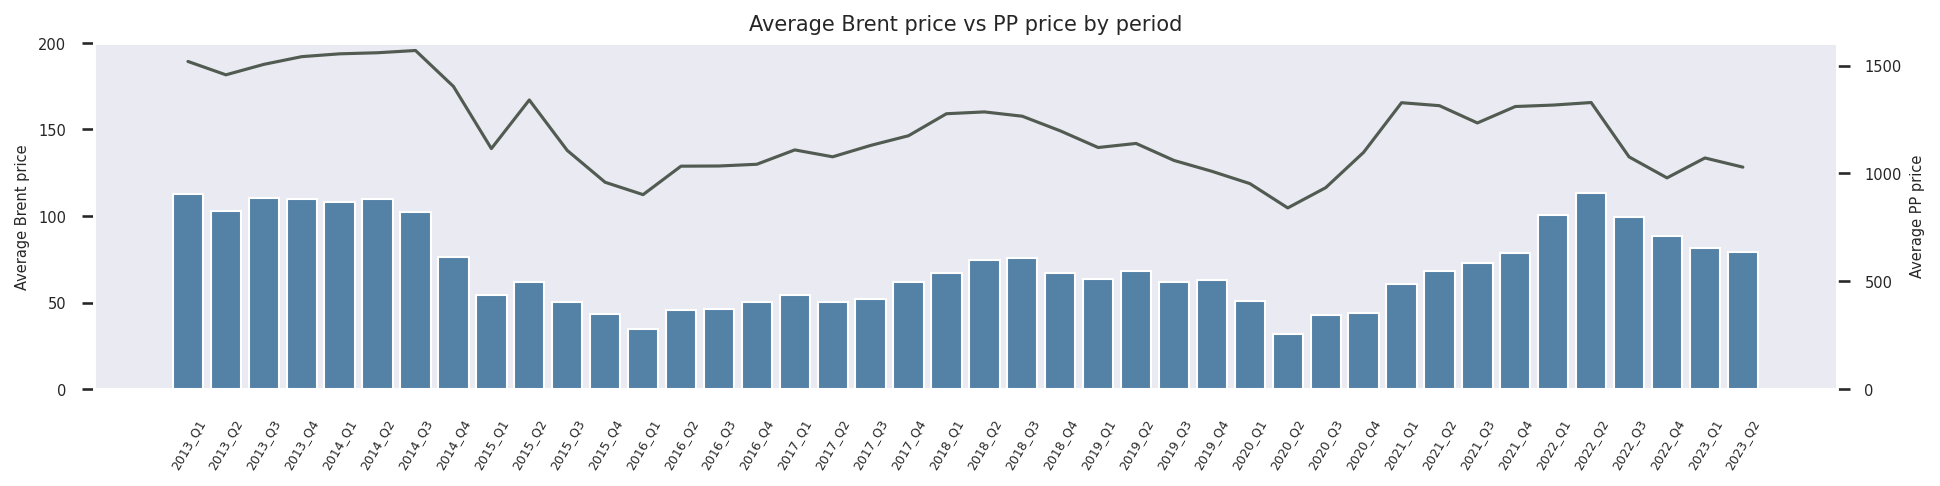

In [ ]:
#Graph11
sns.set(rc={'figure.dpi':150})
sns.set(rc={'figure.figsize':(15,3)})
sns.set(rc={ 'figure.facecolor':'white'})

fig, ax = plt.subplots()
ax2 = ax.twinx()
a = sns.barplot(x='period_Q', y='Brent', color='steelblue', ci='sd', data=avg, ax=ax)
a = ax.set_xlabel('')
ax.grid(False)
ticks = list(range(0,201,50))
a= ax.set_yticks(ticks)
a = ax.set_ylabel('Average Brent price', size = 7)
a = sns.lineplot(x='period_Q', y='PP price', color='#515B51', ci='sd', data=avg, ax=ax2)
a = plt.title('Average Brent price vs PP price by period', size = 10)
a = ax2.set_xlabel('')
ax2.grid(False)
ticks2 = list(range(0,1600,500))
a= ax2.set_yticks(ticks2)
a = ax2.set_ylabel('Average PP price', size = 7)


_ = plt.setp( ax.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( ax.get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

_ = plt.setp( ax2.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( ax2.get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

<ipython-input-21-4ac9c1e5f7c7>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.barplot(x='period_Q', y='Brent', color='steelblue', ci='sd', data=avg, ax=ax)
<ipython-input-21-4ac9c1e5f7c7>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.lineplot(x='period_Q', y='PX price', color='#8C7547', ci='sd', data=avg, ax=ax2)


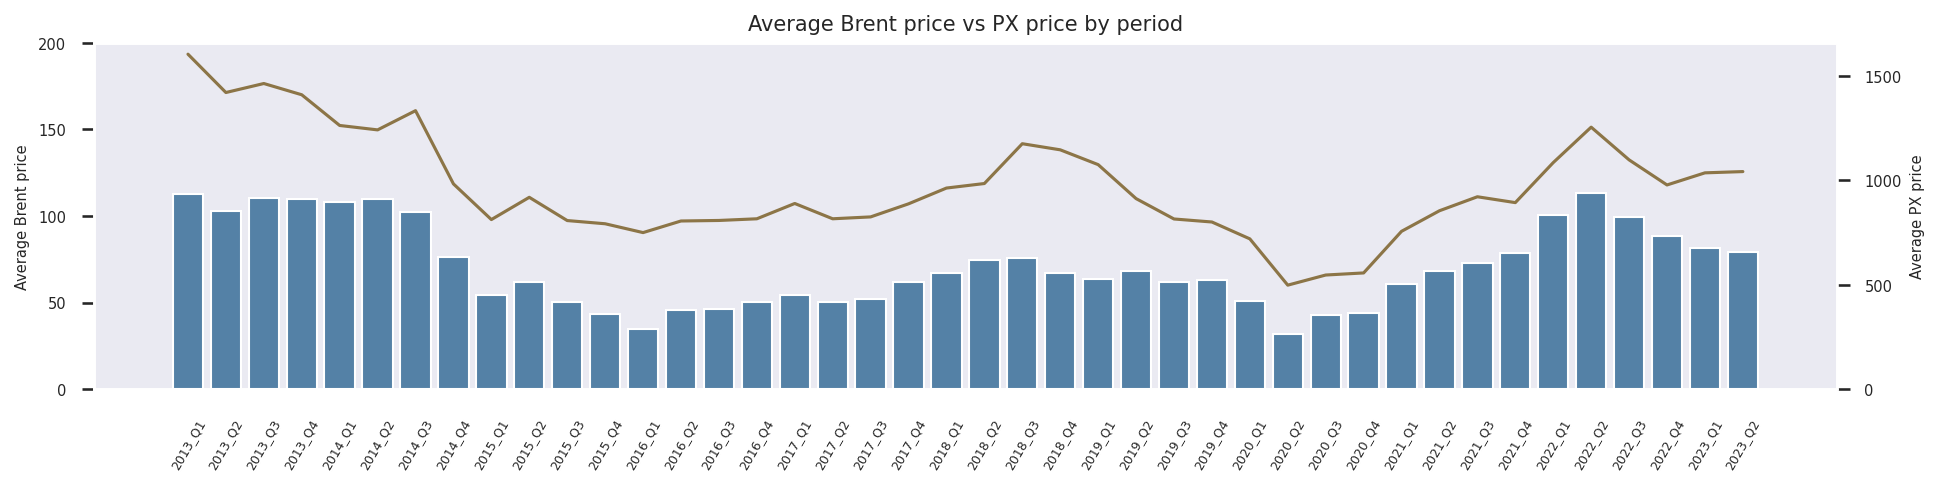

In [ ]:
#Graph12
sns.set(rc={'figure.dpi':150})
sns.set(rc={'figure.figsize':(15,3)})
sns.set(rc={ 'figure.facecolor':'white'})

fig, ax = plt.subplots()
ax2 = ax.twinx()
a = sns.barplot(x='period_Q', y='Brent', color='steelblue', ci='sd', data=avg, ax=ax)
a = ax.set_xlabel('')
ax.grid(False)
ticks = list(range(0,201,50))
a= ax.set_yticks(ticks)
a = ax.set_ylabel('Average Brent price', size = 7)
a = sns.lineplot(x='period_Q', y='PX price', color='#8C7547', ci='sd', data=avg, ax=ax2)
a = plt.title('Average Brent price vs PX price by period', size = 10)
a = ax2.set_xlabel('')
ax2.grid(False)
ticks2 = list(range(0,1600,500))
a= ax2.set_yticks(ticks2)
a = ax2.set_ylabel('Average PX price', size = 7)


_ = plt.setp( ax.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( ax.get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

_ = plt.setp( ax2.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( ax2.get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

<ipython-input-22-ba53d461f78b>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.barplot(x='period_Q', y='Brent', color='steelblue', ci='sd', data=avg, ax=ax)
<ipython-input-22-ba53d461f78b>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.lineplot(x='period_Q', y='Benzene price', color='#EFA747', ci='sd', data=avg, ax=ax2)


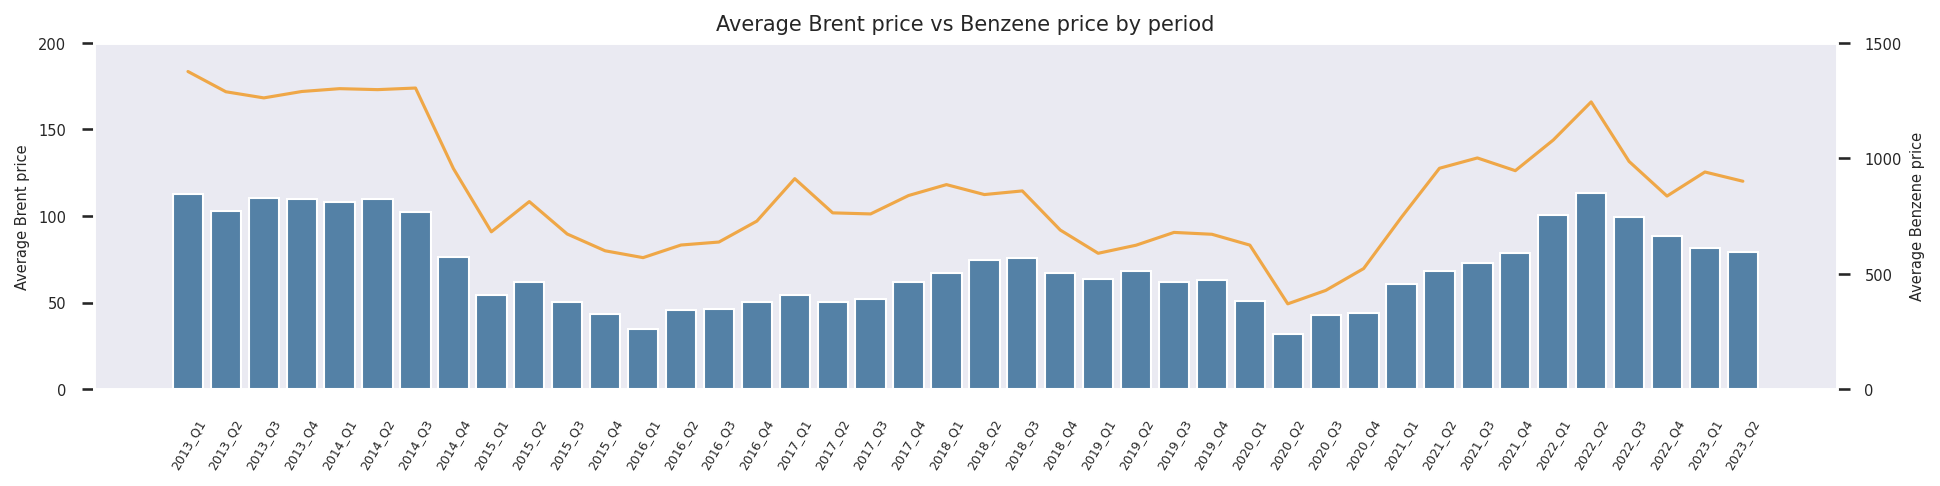

In [ ]:
#Graph13
sns.set(rc={'figure.dpi':150})
sns.set(rc={'figure.figsize':(15,3)})
sns.set(rc={ 'figure.facecolor':'white'})

fig, ax = plt.subplots()
ax2 = ax.twinx()
a = sns.barplot(x='period_Q', y='Brent', color='steelblue', ci='sd', data=avg, ax=ax)
a = ax.set_xlabel('')
ax.grid(False)
ticks = list(range(0,201,50))
a= ax.set_yticks(ticks)
a = ax.set_ylabel('Average Brent price', size = 7)
a = sns.lineplot(x='period_Q', y='Benzene price', color='#EFA747', ci='sd', data=avg, ax=ax2)
a = plt.title('Average Brent price vs Benzene price by period', size = 10)
a = ax2.set_xlabel('')
ax2.grid(False)
ticks2 = list(range(0,1600,500))
a= ax2.set_yticks(ticks2)
a = ax2.set_ylabel('Average Benzene price', size = 7)


_ = plt.setp( ax.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( ax.get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

_ = plt.setp( ax2.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( ax2.get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

In [ ]:
#transpose first
df5 = df3[['date_y','HDPE price','PP price','PX price','Benzene price']].groupby('date_y')
avg2 = df5[['HDPE price','PP price','PX price','Benzene price']].mean().reset_index()
#avg2
avg3 = avg2.melt( id_vars=['date_y'],             # Column(s) to use as identifier variables (these columns will not be melted)
         value_vars=['HDPE price','PP price','PX price','Benzene price'] )
avg3

,date_y,variable,value
0,2013,HDPE price,1479.134615
1,2014,HDPE price,1545.865385
2,2015,HDPE price,1237.884615
3,2016,HDPE price,1144.339623
4,2017,HDPE price,1179.711538
5,2018,HDPE price,1300.192308
6,2019,HDPE price,991.442308
7,2020,HDPE price,885.673077
8,2021,HDPE price,1179.339623
9,2022,HDPE price,1177.500000


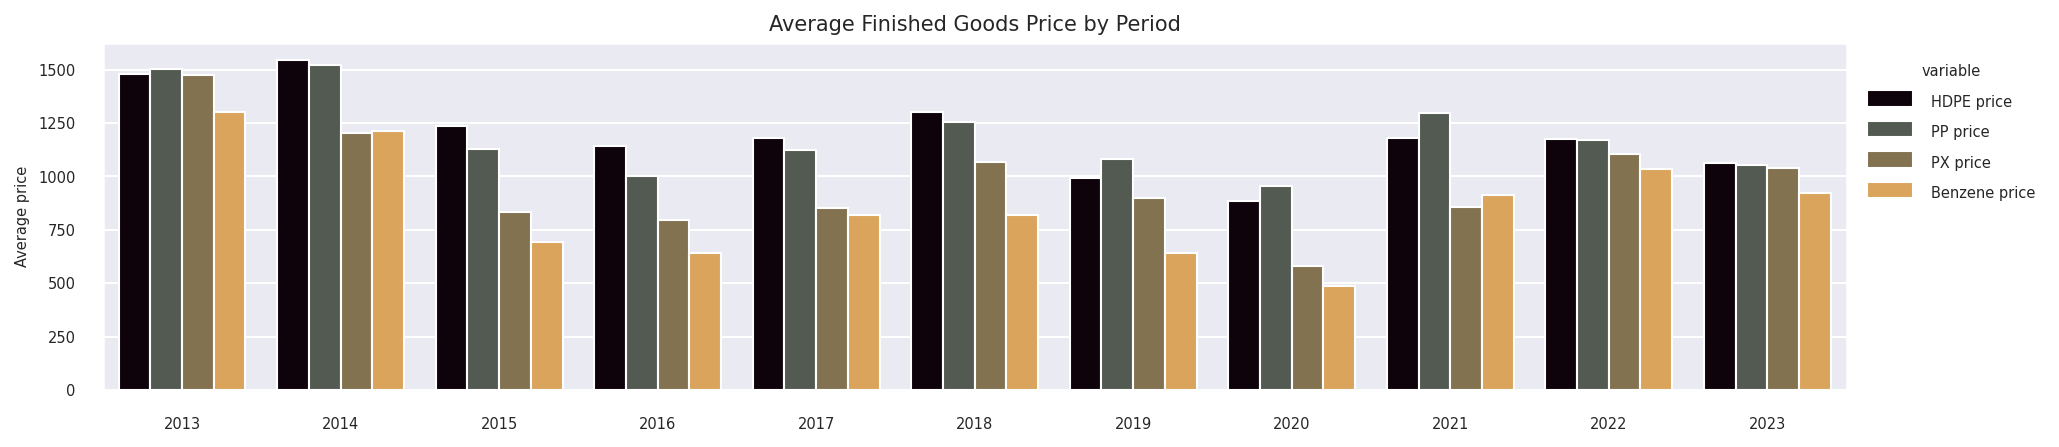

In [74]:
#Graph14
sns.set(rc={'figure.dpi':150})
sns.set(rc={'figure.figsize':(15,3)})
sns.set(rc={ 'figure.facecolor':'white'})

my_palette = ['#10000C']* avg3.date_y.nunique()
my_palette[1] = '#515B51'
my_palette[2] = '#8C7547'
my_palette[3] = '#EFA747'


fig, ax = plt.subplots()
b = sns.barplot(x='date_y',
           y='value',
           hue="variable",
           data=avg3,
           palette=my_palette)

b = ax.set_xlabel('')
b = ax.set_ylabel('Average price', size = 7)

b = sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

b = plt.title('Average Finished Goods Price by Period', size = 10)

_ = plt.setp( ax.get_legend().get_texts(),    # Set one or more properties regarding this artist object
              size=7)

_ = plt.setp( ax.get_legend().get_title(),    # Set one or more properties regarding this artist object
              size=7)

_ = plt.setp( ax.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=0, horizontalalignment='center', size=7)

_ = plt.setp( ax.get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

<ipython-input-58-5731827a47ec>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.barplot(x='period_Q', y='PP price', color='#515B51', ci='sd', data=avg, ax=ax, alpha= 0.6)
<ipython-input-58-5731827a47ec>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  a = sns.lineplot(x='period_Q', y='ABS price', color='#F46A4E', ci='sd', data=avg, ax=ax2, label='ABS price')


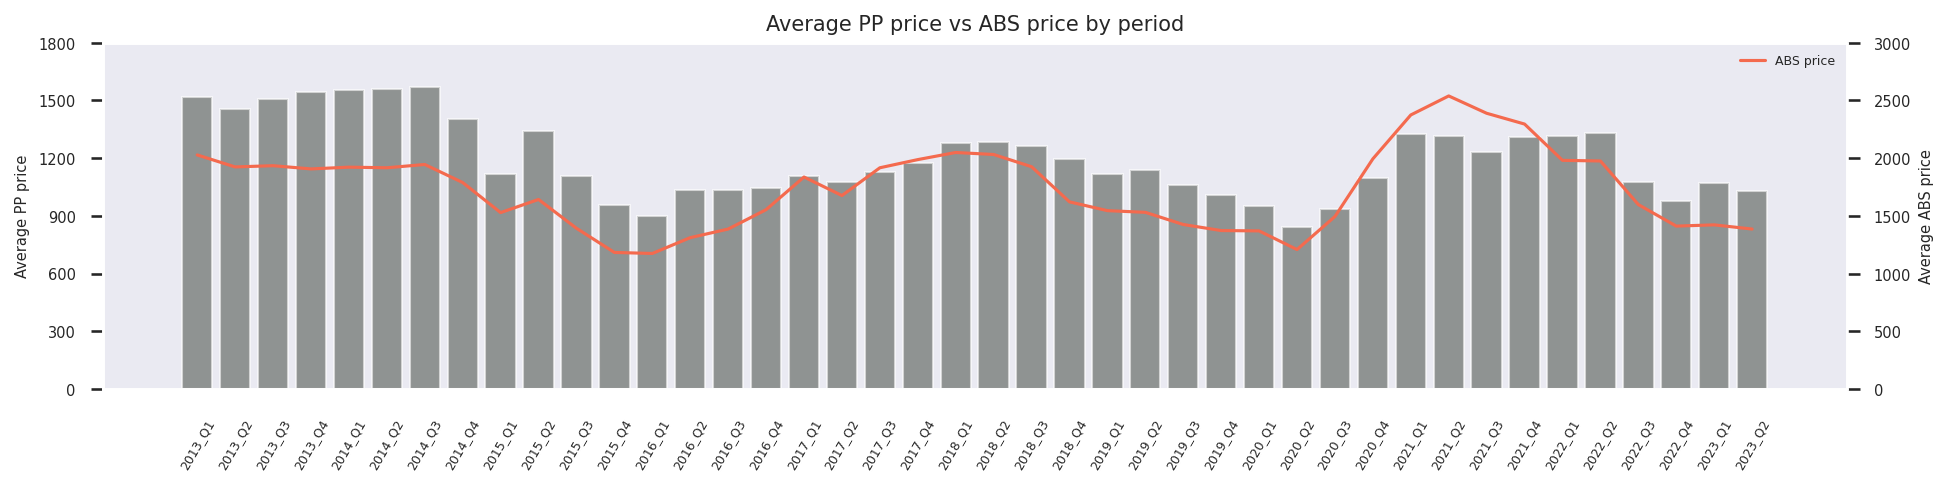

In [ ]:
#Graph15
sns.set(rc={'figure.dpi':150})
sns.set(rc={'figure.figsize':(15,3)})
sns.set(rc={ 'figure.facecolor':'white'})

fig, ax = plt.subplots()
ax2 = ax.twinx()
a = sns.barplot(x='period_Q', y='PP price', color='#515B51', ci='sd', data=avg, ax=ax, alpha= 0.6)

a = ax.set_xlabel('')
ax.grid(False)
ticks = list(range(0,2000,300))
a= ax.set_yticks(ticks)
a = ax.set_ylabel('Average PP price', size = 7)

a = sns.lineplot(x='period_Q', y='ABS price', color='#F46A4E', ci='sd', data=avg, ax=ax2, label='ABS price')
a = plt.title('Average PP price vs ABS price by period', size = 10)
a = ax2.set_xlabel('')
ax2.grid(False)
ticks2 = list(range(0,3100,500))
a= ax2.set_yticks(ticks2)
a = ax2.set_ylabel('Average ABS price', size = 7)

a = plt.legend(loc= 'upper right', fontsize= 6)

_ = plt.setp( ax.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( ax.get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)

_ = plt.setp( ax2.get_xticklabels(),    # Set one or more properties regarding this artist object
              rotation=60, horizontalalignment='center', size=6)

_ = plt.setp( ax2.get_yticklabels(),    # Set one or more properties regarding this artist object
              size=7)
